качество вина

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка отображения русских символов
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.style.use('seaborn')

# Загрузка данных из локального файла
wine_data = pd.read_csv('data2.csv', sep=';')

# Словарь для перевода названий столбцов
column_translations = {
    'fixed acidity': 'Постоянная кислотность',
    'volatile acidity': 'Летучая кислотность',
    'citric acid': 'Лимонная кислота',
    'residual sugar': 'Остаточный сахар',
    'chlorides': 'Хлориды',
    'free sulfur dioxide': 'Свободный диоксид серы',
    'total sulfur dioxide': 'Общий диоксид серы',
    'density': 'Плотность',
    'pH': 'pH',
    'sulphates': 'Сульфаты',
    'alcohol': 'Алкоголь',
    'quality': 'Качество'
}

# Переименование столбцов
wine_data = wine_data.rename(columns=column_translations)

# Просмотр первых строк данных и информации о датасете
print("Первые 5 строк данных:")
print(wine_data.head())
print("\nИнформация о датасете:")
print(wine_data.info())

# Разделение на признаки и целевую переменную
X = wine_data.drop('Качество', axis=1)  
y = wine_data['Качество']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Получение коэффициентов регрессии
coefficients = pd.DataFrame({
    'Признак': X.columns,
    'Коэффициент': model.coef_
})
print("\nКоэффициенты регрессии:")
print(coefficients.sort_values(by='Коэффициент', ascending=False))
print("\nСвободный член:", model.intercept_)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nСреднеквадратичная ошибка (MSE): {mse:.4f}")
print(f"Коэффициент детерминации (R²): {r2:.4f}")

# Визуализация фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактические значения качества')
plt.ylabel('Предсказанные значения качества')
plt.title('Сравнение фактических и предсказанных значений качества вина')
plt.tight_layout()
plt.show()

# Визуализация важности признаков
plt.figure(figsize=(12, 6))
coefficients_abs = coefficients.copy()
coefficients_abs['Коэффициент'] = abs(coefficients_abs['Коэффициент'])
coefficients_abs = coefficients_abs.sort_values(by='Коэффициент', ascending=True)
plt.barh(coefficients_abs['Признак'], coefficients_abs['Коэффициент'])
plt.xlabel('Абсолютное значение коэффициента')
plt.title('Важность признаков в модели')
plt.tight_layout()
plt.show()

# Дополнительная визуализация - корреляционная матрица
plt.figure(figsize=(12, 8))
correlation_matrix = wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица признаков')
plt.tight_layout()
plt.show()

Первые 5 строк данных:
  fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0  7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0....                                                                                               
1  7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0....                                                                                               
2  7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0...                                                                                               
3  11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,...                                                                                               
4  7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0....                                                                                               

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0

KeyError: "['quality'] not found in axis"

зарплата

Коэффициенты модели:
Наклон (коэффициент): 9423.82
Свободный член: 25321.58

Среднеквадратичная ошибка: 49830096.86
R² score: 0.9024


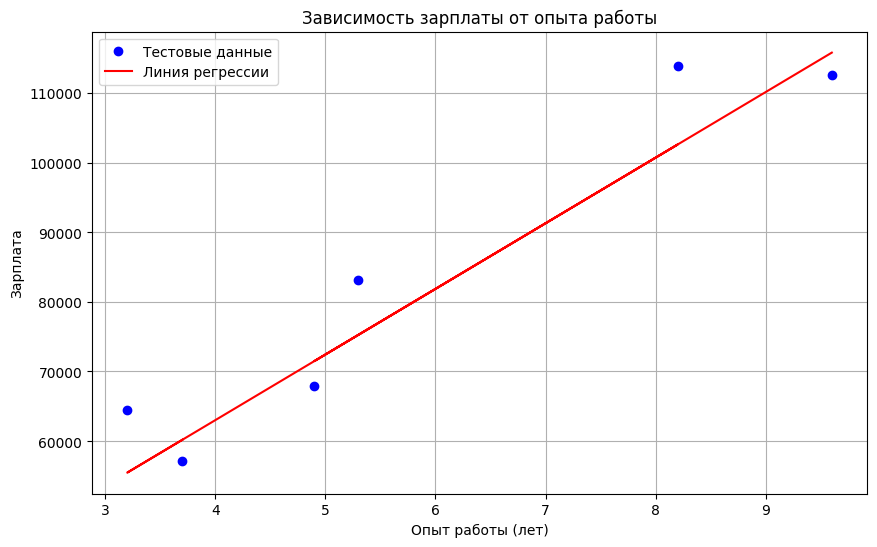


Прогноз зарплаты для разного опыта работы:
Опыт: 2 лет - Предполагаемая зарплата: $44169.21
Опыт: 5 лет - Предполагаемая зарплата: $72440.66
Опыт: 10 лет - Предполагаемая зарплата: $119559.74
Опыт: 15 лет - Предполагаемая зарплата: $166678.81


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Загрузка данных о зарплате
url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
salary_data = pd.read_csv(url)

# Разделение на признаки и целевую переменную
X = salary_data[['YearsExperience']].values
y = salary_data['Salary'].values

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Получение предсказаний
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Коэффициенты модели:")
print(f"Наклон (коэффициент): {model.coef_[0]:.2f}")
print(f"Свободный член: {model.intercept_:.2f}")
print(f"\nСреднеквадратичная ошибка: {mse:.2f}")
print(f"R² score: {r2:.4f}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Тестовые данные')
plt.plot(X_test, y_pred, color='red', label='Линия регрессии')
plt.xlabel('Опыт работы (лет)')
plt.ylabel('Зарплата')
plt.title('Зависимость зарплаты от опыта работы')
plt.legend()
plt.grid(True)
plt.show()

# Построение прогноза для новых значений
new_experience = np.array([[2], [5], [10], [15]])
predicted_salary = model.predict(new_experience)

print("\nПрогноз зарплаты для разного опыта работы:")
for exp, salary in zip(new_experience, predicted_salary):
    print(f"Опыт: {exp[0]} лет - Предполагаемая зарплата: ${salary:.2f}")

1.1.3

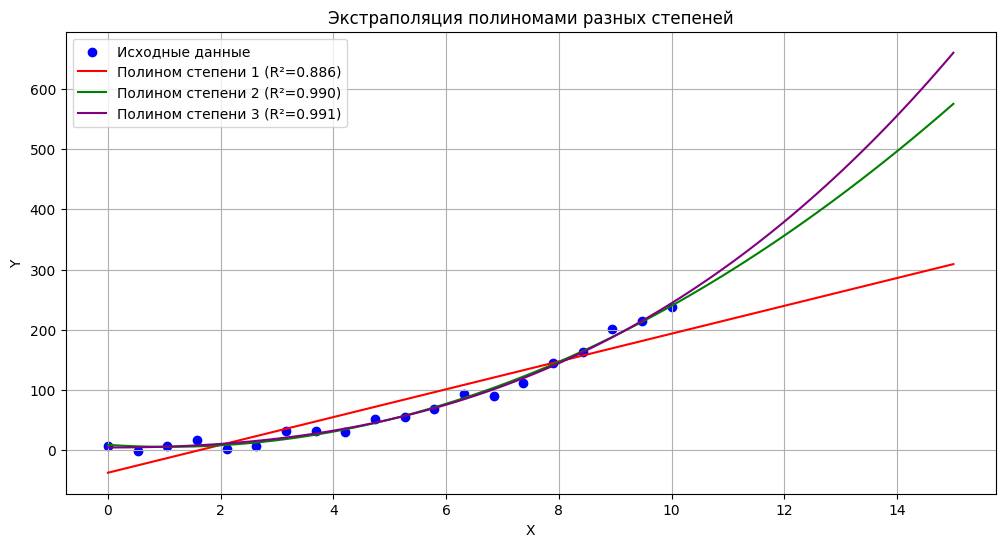


Коэффициенты для полинома степени 1:
y = -37.62 + 23.11x^1

Коэффициенты для полинома степени 2:
y = 8.70 + -6.23x^1 + 2.93x^2

Коэффициенты для полинома степени 3:
y = 4.39 + -0.28x^1 + 1.41x^2 + 0.10x^3


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Генерация собственных данных с некоторым шумом
np.random.seed(42)
X = np.linspace(0, 10, 20)
y = 3 * X**2 - 5 * X + 2 + np.random.normal(0, 10, 20)
X = X.reshape(-1, 1)

# Создание точек для экстраполяции
X_ext = np.linspace(0, 15, 100).reshape(-1, 1)

# Функция для создания и обучения полиномиальной регрессии
def fit_polynomial(X, y, degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Предсказание значений для экстраполяции
    X_ext_poly = poly_features.transform(X_ext)
    y_ext = model.predict(X_ext_poly)
    
    return model, y_ext, r2_score(y, model.predict(X_poly))

# Создание моделей разных степеней
models = []
predictions = []
r2_scores = []

for degree in [1, 2, 3]:
    model, pred, r2 = fit_polynomial(X, y, degree)
    models.append(model)
    predictions.append(pred)
    r2_scores.append(r2)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Исходные данные')

colors = ['red', 'green', 'purple']
degrees = [1, 2, 3]

for i, (pred, color, degree, r2) in enumerate(zip(predictions, colors, degrees, r2_scores)):
    plt.plot(X_ext, pred, color=color, 
             label=f'Полином степени {degree} (R²={r2:.3f})')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Экстраполяция полиномами разных степеней')
plt.legend()
plt.grid(True)
plt.show()

# Анализ коэффициентов для каждой модели
for i, (model, degree) in enumerate(zip(models, degrees)):
    print(f"\nКоэффициенты для полинома степени {degree}:")
    coeffs = model.coef_
    intercept = model.intercept_
    
    equation = f"y = {intercept:.2f}"
    for j, coef in enumerate(coeffs[1:]):
        equation += f" + {coef:.2f}x^{j+1}"
    
    print(equation)

регрессия


Параметры для Линейная функции:
Параметр 1: -0.1158
Параметр 2: 0.9646

Параметры для Экспоненциальная функции:
Параметр 1: 4.5768
Параметр 2: 0.7987

Параметры для Логарифмическая функции:
Параметр 1: -0.8040
Параметр 2: 1.7522

Параметры для Степенная функции:
Параметр 1: 2.1884
Параметр 2: -1.4984


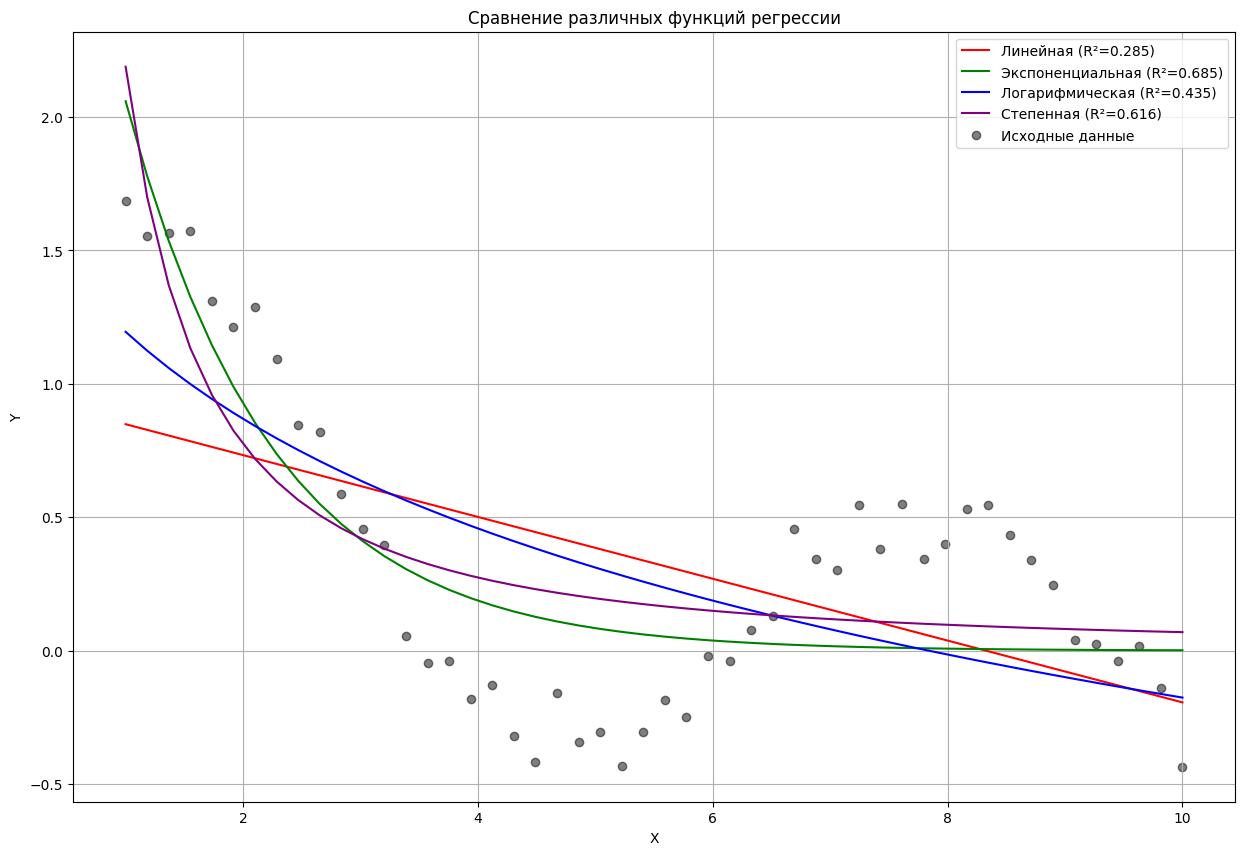


Анализ динамики данных:
Минимальное значение y: -0.4348
Максимальное значение y: 1.6835
Среднее значение y: 0.3275
Стандартное отклонение y: 0.5747


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Генерация данных
np.random.seed(42)
x = np.linspace(1, 10, 50)
y = 2 * np.exp(-0.5 * x) + 0.5 * np.sin(x) + np.random.normal(0, 0.1, 50)

# Определение различных функций для регрессии
def linear(x, a, b):
    return a * x + b

def exponential(x, a, b):
    return a * np.exp(-b * x)

def logarithmic(x, a, b):
    return a * np.log(x + 1) + b

def power(x, a, b):
    return a * x**b

# Подгонка различных функций
functions = {
    'Линейная': linear,
    'Экспоненциальная': exponential,
    'Логарифмическая': logarithmic,
    'Степенная': power
}

plt.figure(figsize=(15, 10))
colors = ['red', 'green', 'blue', 'purple']

# Подгонка и визуализация каждой функции
for (name, func), color in zip(functions.items(), colors):
    try:
        popt, _ = curve_fit(func, x, y)
        y_fit = func(x, *popt)
        
        # Вычисление R²
        r2 = 1 - np.sum((y - y_fit)**2) / np.sum((y - np.mean(y))**2)
        
        plt.plot(x, y_fit, color=color, 
                label=f'{name} (R²={r2:.3f})')
        
        print(f"\nПараметры для {name} функции:")
        for i, param in enumerate(popt):
            print(f"Параметр {i+1}: {param:.4f}")
            
    except RuntimeError:
        print(f"Не удалось подогнать {name} функцию")

plt.scatter(x, y, color='black', alpha=0.5, label='Исходные данные')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Сравнение различных функций регрессии')
plt.legend()
plt.grid(True)
plt.show()

# Анализ динамики изменения данных
print("\nАнализ динамики данных:")
print(f"Минимальное значение y: {np.min(y):.4f}")
print(f"Максимальное значение y: {np.max(y):.4f}")
print(f"Среднее значение y: {np.mean(y):.4f}")
print(f"Стандартное отклонение y: {np.std(y):.4f}")